<hr style="border:2px solid gray">

#**STEP: 1/5** - Review previous Code-Along, and wrangle both train and test data.


### Import libraries and define the data path

In [ ]:
# import the necessary libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from itertools import compress

In [ ]:
%%capture

!pip install category_encoders==2.*
from category_encoders import OneHotEncoder

In [ ]:
#Update the DATA_PATH variable

import sys

if 'google.colab' in sys.modules:
  # If you're on Colab:
  DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_2/main/data/flight/'
else:
  # If you're working locally:
  DATA_PATH = '..../data/'

### Wrangle the dataset

In [ ]:


def wrangle(filepath):
  df = pd.read_excel(filepath)

  # Drop row(s) where there is/are missing values
  df.dropna(inplace = True)
  
  # Duration is in a string format. Converting duration into minutes.
  df['Duration'] = df['Duration'].apply(convert_duration)

  # formatting the stops. 'non-stop' output is replaced by 0 in the Total_Stops,
  # and the rest of the values would be filled in by the number of stops

  df['Total_Stops'] = df['Total_Stops'].str.split(" ").str[0]
  df['Total_Stops'].replace('non-stop' , 0 , inplace = True)

  # Converting the stops dtype to int
  df['Total_Stops'] = df["Total_Stops"].astype(int)


  return df

def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60

# wrangle both your train and test set in exactly the same way

df = wrangle(DATA_PATH + 'Data_Train.xlsx')
X_test = wrangle(DATA_PATH + 'Test_set.xlsx')

In [ ]:
#what is the shape of these two dataset?

df.shape, X_test.shape

((10682, 11), (2671, 10))

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


In [ ]:
X_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,0,No info


<hr style="border:2px solid gray">

#**STEP: 2/5** - Improve Wrangle Function

In [ ]:
# determine the number of unique values in all the remaining columns. 
for col in df:
  print(col,':',df[col].nunique())

Airline : 12
Date_of_Journey : 44
Source : 5
Destination : 6
Route : 128
Dep_Time : 222
Arrival_Time : 1343
Duration : 367
Total_Stops : 5
Additional_Info : 10
Price : 1870


In [ ]:
# inside the wrangle function, drop the columns that are high cardinal or cause data redundancy. Add to the inside the wrangle function
# df.drop(columns=['Route','Dep_Time','Arrival_Time'], inplace=True)

In [ ]:
# modify the read_csv in wrangle function
# df = pd.read_excel(filepath, parse_dates=['Date_of_Journey'])


In [ ]:
# FINAL VERSION OF THE WRANGLE FUNCTION

def wrangle(filepath):
  df = pd.read_excel(filepath, parse_dates=['Date_of_Journey'],index_col='Date_of_Journey')

  # Drop row(s) where there is/are missing values
  df.dropna(inplace = True)
  
  # Duration is in a string format. Converting duration into minutes.
  df['Duration'] = df['Duration'].apply(convert_duration)

  # formatting the stops. 'non-stop' output is replaced by 0 in the Total_Stops,
  # and the rest of the values would be filled in by the number of stops

  df['Total_Stops'] = df['Total_Stops'].str.split(" ").str[0]
  df['Total_Stops'].replace('non-stop' , 0 , inplace = True)

  # Converting the stops dtype to int
  df['Total_Stops'] = df["Total_Stops"].astype(int)

  # drop the columns that are no longer needed 
  df.drop(columns=['Route','Dep_Time','Arrival_Time'], inplace=True)

  return df

def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60


df = wrangle(DATAPATH + 'Data_Train.xlsx')
X_test = wrangle(DATAPATH + 'Test_set.xlsx')

In [ ]:
# cleaned datasets after wrangling

df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price
Date_of_Journey,,,,,,,
2019-03-24,IndiGo,Banglore,New Delhi,170,0,No info,3897
2019-01-05,Air India,Kolkata,Banglore,445,2,No info,7662
2019-09-06,Jet Airways,Delhi,Cochin,1140,2,No info,13882
2019-12-05,IndiGo,Kolkata,Banglore,325,1,No info,6218
2019-01-03,IndiGo,Banglore,New Delhi,285,1,No info,13302


In [ ]:
X_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info
Date_of_Journey,,,,,,
2019-06-06,Jet Airways,Delhi,Cochin,655,1,No info
2019-12-05,IndiGo,Kolkata,Banglore,240,1,No info
2019-05-21,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included
2019-05-21,Multiple carriers,Delhi,Cochin,780,1,No info
2019-06-24,Air Asia,Banglore,Delhi,170,0,No info


In [ ]:
# do we have any null values? 

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10682 entries, 2019-03-24 to 2019-09-05
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Duration         10682 non-null  int64 
 4   Total_Stops      10682 non-null  int64 
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 667.6+ KB


<hr style="border:2px solid gray">

#**STEP: 3/5** - Split Data and determine a baseline

In [ ]:
# Split the data into Feature Matrix and Target Vector

target = 'Price'
y = df[target]
X = df.drop(columns=target)

In [ ]:
# Split data into Train and Validation sets 
# (Use data from Jan to Aug 2019 as Training Set. Use data from Sept to Dec 2019 as Validation Set.)

cutoff = '2019-09-01'
mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [ ]:
# Determine the baseline for our regression task

y_pred_baseline = [y_train.mean()] * len(y_train)
print('BASELINE MAE', mean_absolute_error(y_train,y_pred_baseline))

BASELINE MAE 3734.7563276993656


<hr style="border:2px solid gray">

#**STEP: 4/5** - Implement a univariate feature selection process and build Ridge model pipeline

In [ ]:
model_ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    Ridge()
)

model_ridge.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Airline', 'Source', 'Destination',
                                     'Additional_Info'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f55901bfdd0>)),
                ('ridge', Ridge())])

<hr style="border:2px solid gray">

#**STEP: 5/5** - Model Interpretation


In [ ]:
# Evaluate the model performance and compare it to the baseline

print('Ridge training MAE:', mean_absolute_error(y_train, model_ridge.predict(X_train)))
print('Ridge validation MAE:', mean_absolute_error(y_val, model_ridge.predict(X_val)))

Ridge training MAE: 2191.2152715164543
Ridge test MAE: 1843.6956181146923


In [ ]:
# Make a list of all features selected by the SelectKBest method

features = model_ridge.named_steps['onehotencoder'].get_feature_names()
mask = model_ridge.named_steps['selectkbest'].get_support().tolist()
selected_features = list(compress(features, mask))

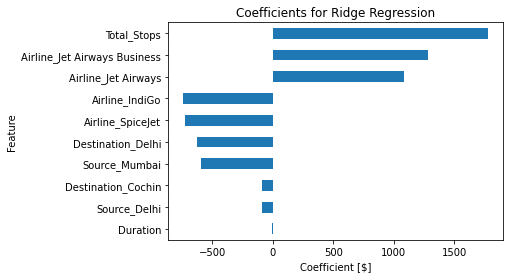

In [ ]:
# Plot the top ten coefficients

coefficients = model_ridge.named_steps['ridge'].coef_
feat_imp = pd.Series(coefficients, index=selected_features).sort_values(key=abs)
feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Ridge Regression');